<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/BookMachineLearning/blob/main/folder/cap_3/Livro_cap_3_MultiClassClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist=fetch_openml("mnist_784",version=1)

In [3]:
X,y=mnist["data"],mnist["target"].astype(np.uint8)

In [4]:
X_train,y_train,X_test,y_test=X[:60000],y[:60000],X[60000:],y[60000:]
some_digit=X_test.iloc[5]

#Most of the models can be a Binary Classifier and a MultiClass Classifier, so the construction of a MultiClass classifier is the same of a binary classifier

In [5]:

from sklearn.linear_model import SGDClassifier
sgd_classifier=SGDClassifier()
sgd_classifier.fit(X_train,y_train)


SGDClassifier()

In [6]:
print(sgd_classifier.predict([some_digit]))
print(sgd_classifier.decision_function([some_digit]))#the model generates 9 predictions, the higher prediction corresponds to the model classification, in this case 1

[1]
[[-37422.19140522   5648.52553986  -2555.11123248  -3044.16326033
  -11144.53835764  -6226.73277455  -9270.00689846  -3375.87937769
   -3728.50290129  -2192.71440911]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier,X_train,y_train,cv=3,scoring="accuracy")

array([0.8687 , 0.84265, 0.88115])

In [8]:
X_train.var().max(),X_train.var().min()

(12953.628367111674, 0.0)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled=scaler.transform(X_test)

In [12]:
#cross_val_score(sgd_classifier,X_train_scaled,y_train,cv=3,scoring="accuracy")

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_predictions=cross_val_predict(sgd_classifier,X_train_scaled[:15000],y_train[:15000],cv=2)
confusion_matrix(y_train[:15000],y_train_predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[1408,    0,   20,    4,    3,   18,   16,    2,   25,    0],
       [   0, 1609,   17,    8,    2,   15,    1,    1,   34,    3],
       [  14,   10, 1254,   36,   13,   11,   24,   15,   80,    5],
       [   9,   12,   51, 1311,    0,   54,    6,   19,   62,   24],
       [   4,    7,   16,    7, 1311,    3,   14,   10,   43,   53],
       [  11,    9,   11,   49,   16, 1088,   27,    3,   85,   19],
       [  14,    4,   16,    1,   20,   18, 1399,    0,   18,    0],
       [   4,    2,   21,   11,   16,    0,    2, 1431,   13,   93],
       [  11,   20,   23,   50,    4,   36,   14,    4, 1254,   16],
       [  11,    6,   12,   36,   41,    7,    1,   40,   37, 1312]])

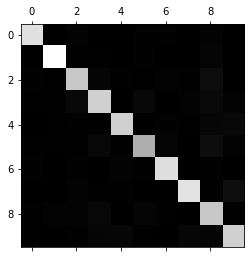

In [13]:
conf_mx=confusion_matrix(y_train[:15000],y_train_predictions)
import matplotlib.pyplot as plt
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()#The model is struggling to predict 5 correctely 

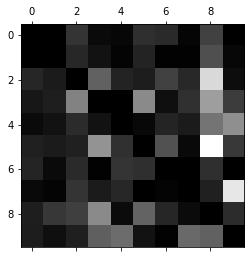

In [14]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show() #here we can see the model also has difficulties to predict 8

# Now let's build a MultiLabel model, a model who can predict two outputs for the same data


In [15]:
y_train_higher= (y_train>=7)
y_train_odd= (y_train %2==0)
y_multilabel=np.c_[y_train_higher,y_train_odd]
print(y_multilabel)

[[False False]
 [False  True]
 [False  True]
 ...
 [False False]
 [False  True]
 [ True  True]]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [18]:
knn.predict([some_digit])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False]])

In [19]:
print(y_test.iloc[5])

1
